# Test getting data and graph

In [10]:
from key import apikey
import requests
import pandas as pd

In [62]:
stocks = ['IBM','TSLA']

In [5]:
def GetPrices(stock):
    '''
    This is to get the data from Alpha Vantage
    '''
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={apikey()}"
    r = requests.get(url)
    return r.json()

In [57]:
ibmData = GetPrices(stocks[1])

In [12]:
pd.DataFrame.from_dict(ibmData['Time Series (Daily)'])

,2021-07-09,2021-07-08,2021-07-07,2021-07-06,2021-07-02,2021-07-01,2021-06-30,2021-06-29,2021-06-28,2021-06-25,...,2021-03-02,2021-03-01,2021-02-26,2021-02-25,2021-02-24,2021-02-23,2021-02-22,2021-02-19,2021-02-18,2021-02-17
1. open,141.4500,137.7800,138.7600,139.9900,146.9100,146.9600,145.1300,145.2600,147.0100,145.3800,...,120.7400,120.3500,122.2500,123.3700,120.8000,120.9200,118.5000,120.7500,120.5000,119.2700
2. high,141.9800,141.3100,140.3300,140.4200,146.9500,147.5000,146.9300,146.7400,147.3000,146.9300,...,121.9000,122.3200,122.2500,124.3500,123.4900,121.3500,121.1250,120.7600,120.9400,120.5600
3. low,140.8410,137.6600,138.7600,137.1000,139.4600,146.5700,144.7100,145.1000,144.9121,144.9450,...,120.2600,119.8649,118.8800,122.3350,120.5200,119.8000,118.4400,118.3800,119.7000,119.0200
4. close,141.5200,140.7400,139.8200,138.7800,140.0200,146.8400,146.5900,145.5500,145.2900,146.8400,...,120.3300,120.7400,118.9300,122.4700,123.2100,120.7100,120.8600,118.9900,120.7300,119.9700
5. volume,3904059,5487425,4059667,8093747,16828161,2686289,3245091,2428626,3888869,3594218,...,4524299,5715767,8868848,5672671,5819983,4531464,5838841,6578741,5399145,3949876


In [90]:
def ConvertJsonToDataFrame(data):
    '''
    Put in the json from the GetPrices API and return a dataframe of the clean data
    '''
    df = pd.DataFrame.from_dict(data['Time Series (Daily)'])
    df = df.transpose()
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.rename(columns={'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'})
    df['close'] = df['close'].astype(float)
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['volume'] = df['volume'].astype(int)
    return df
df2 = ConvertJsonToDataFrame(ibmData)
display(df2.head())
display(df2.info())

,open,high,low,close,volume
2021-02-17,2100.00,2133.660,2098.92,2128.31,1020252
2021-02-18,2110.39,2132.735,2103.71,2117.20,1121855
2021-02-19,2119.27,2130.530,2097.41,2101.14,1457612
2021-02-22,2067.00,2091.420,2062.14,2064.88,1349856
2021-02-23,2025.01,2082.010,2002.02,2070.86,1667377


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2021-02-17 to 2021-07-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


None

In [30]:
import numpy as np

In [31]:
np.max(df2['close'])

'151.2800'

In [51]:
np.min(df2.index)

Timestamp('2021-02-17 00:00:00')

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<Figure size 432x288 with 0 Axes>

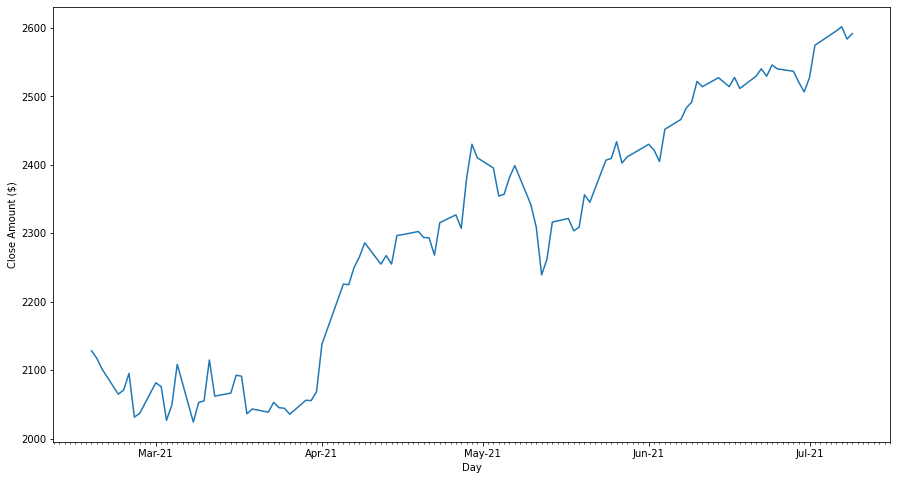

In [59]:
plt.clf()
plt.figure(figsize=(15,8))
plt.plot(df2.index, df2['close'])

myFmt = mdates.DateFormatter('%b-%y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.ylabel('Close Amount ($)')
plt.xlabel('Day')
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.show()

# End to end

In [69]:
def GetStocksGraph(stocks_list):
    '''
    Send in a list of stocks and get a graph out
    '''
    plt.clf()
    #plt.figure(figsize=(15,8))
    #y_min = None
    #y_max = None
    #for s in stocks_list:
    #    sdf = ConvertJsonToDataFrame(GetPrices(s))
    #    plt.plot(sdf.index, sdf['close'], label=s)
    #    cur_min = np.min(sdf['close'])
    #    if y_min is None or cur_min < y_min:
    #        y_min = cur_min
    #    cur_max = np.max(sdf['close'])
    #    if y_max is None or cur_max > y_max:
    #        y_max = cur_max
    
    #myFmt = mdates.DateFormatter('%b-%y')
    #plt.gca().xaxis.set_major_formatter(myFmt)
    #plt.ylabel('Close Amount ($)')
    #plt.xlabel('Day')
    #plt.ylim(top=y_max, bottom=y_min)
    #plt.legend()
    #plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
    #plt.show()
    
    fig, ax = plt.subplots()
    y_min = None
    y_max = None
    for s in stocks_list:
        sdf = ConvertJsonToDataFrame(GetPrices(s))
        ax.plot(sdf.index, sdf['close'], label=s)
        cur_min = np.min(sdf['close'])
        if y_min is None or cur_min < y_min:
            y_min = cur_min
        cur_max = np.max(sdf['close'])
        if y_max is None or cur_max > y_max:
            y_max = cur_max
        display(sdf.head())
    myFmt = mdates.DateFormatter('%b-%y')
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.set_ylabel('Close Amount ($)')
    ax.set_xlabel('Day')
    ax.set_ylim(top=y_max, bottom=y_min)
    ax.legend()
    plt.show()
        

,open,high,low,close,volume
2021-02-17,119.27,120.560,119.02,119.97,3949876
2021-02-18,120.50,120.940,119.70,120.73,5399145
2021-02-19,120.75,120.760,118.38,118.99,6578741
2021-02-22,118.50,121.125,118.44,120.86,5838841
2021-02-23,120.92,121.350,119.80,120.71,4531464


,open,high,low,close,volume
2021-02-17,779.09,799.8400,762.01,798.15,25878526
2021-02-18,780.90,794.6900,776.27,787.38,17957058
2021-02-19,795.00,796.7899,777.37,781.30,18958255
2021-02-22,762.64,768.5000,710.20,714.50,36594555
2021-02-23,662.13,713.6099,619.00,698.84,66606882


<Figure size 432x288 with 0 Axes>

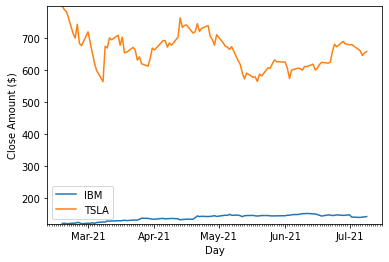

In [95]:
GetStocksGraph(['IBM','TSLA'])

In [65]:
for s in stocks:
    print(s)

IBM
TSLA


In [92]:
df3 = None
for s in ['IBM','TSLA']:
    if df3 is None:
        df3 = ConvertJsonToDataFrame(GetPrices(s))
        df3['code'] = s
    else:
        sdf = ConvertJsonToDataFrame(GetPrices(s))
        sdf['code'] = s
        df3 = df3.append(sdf)
df3

,open,high,low,close,volume,code
2021-02-17,119.2700,120.560,119.0200,119.97,3949876,IBM
2021-02-18,120.5000,120.940,119.7000,120.73,5399145,IBM
2021-02-19,120.7500,120.760,118.3800,118.99,6578741,IBM
2021-02-22,118.5000,121.125,118.4400,120.86,5838841,IBM
2021-02-23,120.9200,121.350,119.8000,120.71,4531464,IBM
...,...,...,...,...,...,...
2021-07-02,678.9800,700.000,673.2600,678.90,27097374,TSLA
2021-07-06,681.7115,684.000,651.4002,659.58,23284450,TSLA
2021-07-07,664.2700,665.700,638.3200,644.65,18791960,TSLA
2021-07-08,628.3700,654.430,620.4600,652.81,22773316,TSLA


In [93]:
df3[df3.index == '2021-02-17']

,open,high,low,close,volume,code
2021-02-17,119.27,120.56,119.02,119.97,3949876,IBM
2021-02-17,779.09,799.84,762.01,798.15,25878526,TSLA


IBM 151.28
TSLA 798.15


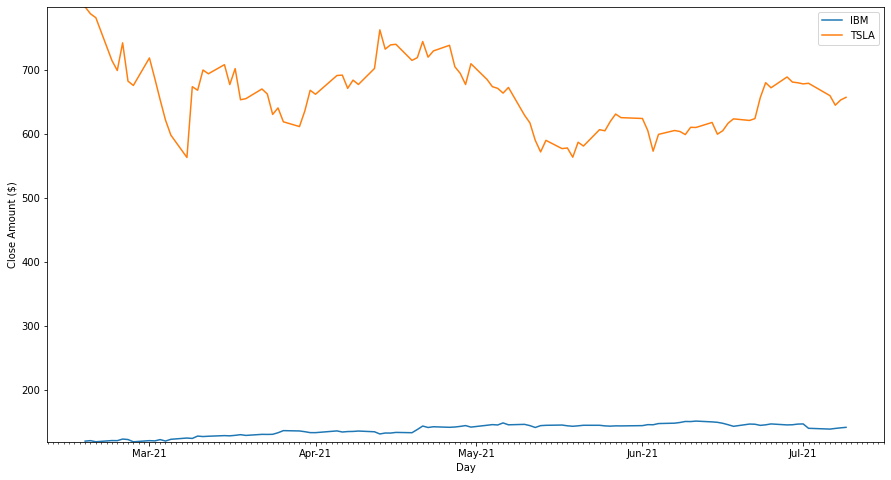

In [94]:
#plt.clf()
plt.figure(figsize=(15,8))
#plt.plot(df3.index, df3['close'], label=df3['code'].unique())
y_min = np.min(df3['close'])
y_max = np.max(df3['close'])
#colors = ['b','y','g','r','p']
#ind = 0
for code in df3['code'].unique():
#code = 'GOOG'
    temp = df3[df3['code'] == code]
    plt.plot(temp.index, temp['close'], label=code)
    print(code, np.max(temp['close']))
myFmt = mdates.DateFormatter('%b-%y')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.ylabel('Close Amount ($)')
plt.xlabel('Day')
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.legend()
plt.ylim(top=y_max, bottom=y_min)
plt.show()

In [109]:
def GetStocksGraph(stocks_list):
    '''
    Send in a list of stocks and get a graph out
    '''
    df = None
    for s in stocks_list:
        if df is None:
            df = ConvertJsonToDataFrame(GetPrices(s))
            df['code'] = s
        else:
            sdf = ConvertJsonToDataFrame(GetPrices(s))
            sdf['code'] = s
            df = df.append(sdf)
    plt.clf()
    plt.figure(figsize=(15,8))
    if df is None:
        y_min = 0
        y_max = 1000
    else:
        y_min = np.min(df['close'])
        y_max = np.max(df['close'])
        
        for code in df['code'].unique():
            temp = df[df['code'] == code]
            plt.plot(temp.index, temp['close'], label=code)
        #print(code, np.max(temp['close']))
        plt.legend()
    myFmt = mdates.DateFormatter('%b-%y')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.ylabel('Close Amount ($)')
    plt.xlabel('Day')
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
    plt.ylim(top=y_max, bottom=y_min)
    plt.show()

<Figure size 432x288 with 0 Axes>

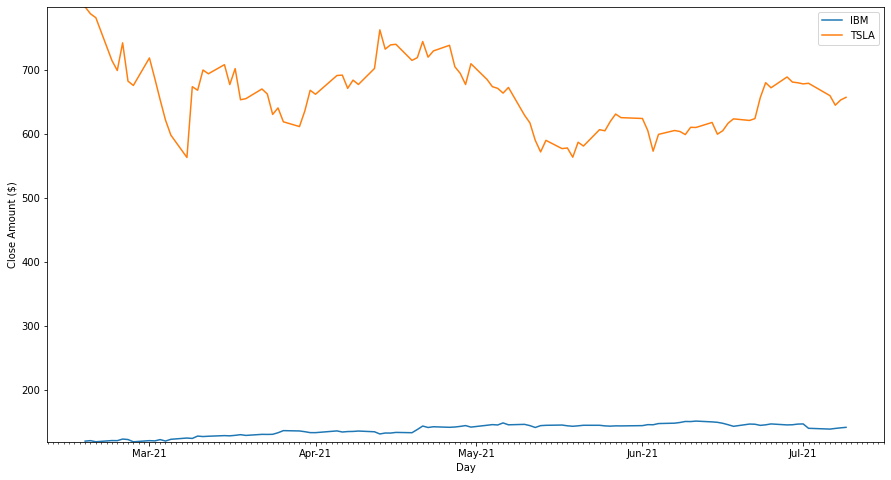

In [111]:
GetStocksGraph(['IBM','TSLA'])

<Figure size 432x288 with 0 Axes>

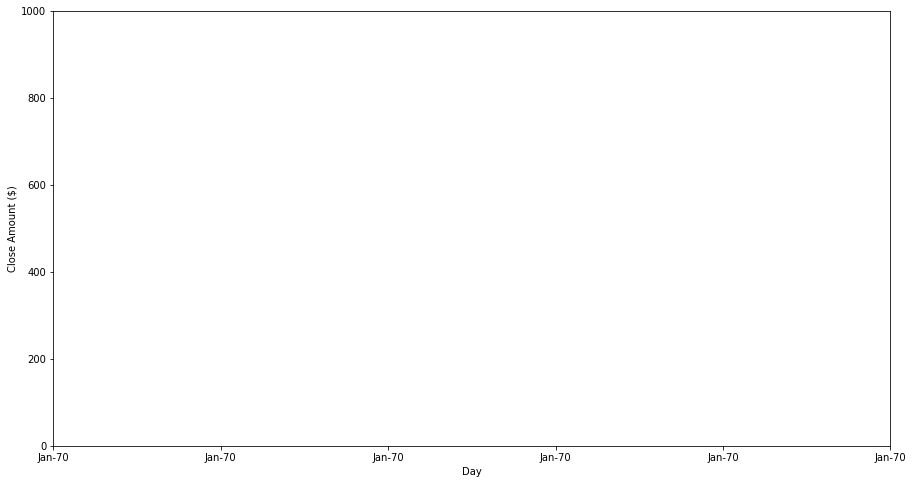

In [110]:
GetStocksGraph([])

In [ ]:
from getStocksGraph import GetStocksGraph
GetStocksGraph(['IBM','TSLA'])